In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# Any results you write to the current directory are saved as output.

In [4]:
import os

# # Google Drive'ı bağlama
from google.colab import drive
drive.mount('/content/drive')

# Çalışma dizinini değiştirme
os.chdir('/content/drive/MyDrive/Python Tensorflow')

# Mevcut çalışma dizinini doğrulama
print("Mevcut dizin:", os.getcwd())

# Dosyaları listeleme
print("Dizin içeriği:")
!ls

Mounted at /content/drive
Mevcut dizin: /content/drive/MyDrive/Python Tensorflow
Dizin içeriği:
bisiklet_fiyatlari.xlsx				 maliciousornot.xlsx	test.csv       Y.npy
convolutional_neural_network_cnn_tutorial.ipynb  merc.xlsx		X.npy
deep_learning_tutorial_for_beginners.ipynb	 TensorflowGiris.ipynb	yenimaas.xlsx


In [6]:
!ls

bisiklet_fiyatlari.xlsx				 maliciousornot.xlsx	test.csv       Y.npy
convolutional_neural_network_cnn_tutorial.ipynb  merc.xlsx		X.npy
deep_learning_tutorial_for_beginners.ipynb	 TensorflowGiris.ipynb	yenimaas.xlsx


Loading the Data Set


In [7]:
# read train
train = pd.read_csv("train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# read test
test= pd.read_csv("test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# put labels into y_train variable
Y_train = train["label"]
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1)

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

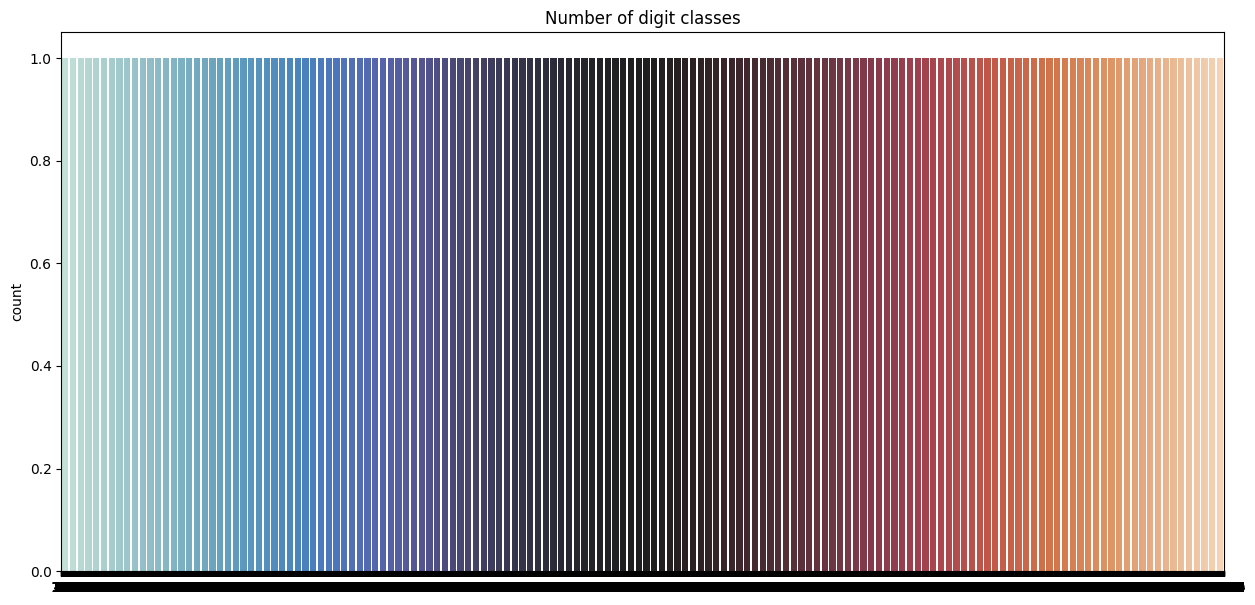

In [10]:
# visualize number of digits classes
plt.figure(figsize=(15,7))
g = sns.countplot(Y_train, palette="icefire")
plt.title("Number of digit classes")
Y_train.value_counts()

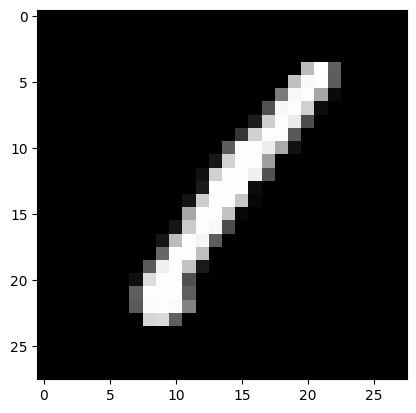

In [11]:
import matplotlib.pyplot as plt

# Assuming X_train is a DataFrame where each row is a flattened image
img = X_train.iloc[0].to_numpy()  # Convert the Series to a NumPy array

# Reshape the image to 28x28 if that's the expected shape
img = img.reshape((28, 28))

# Plot the image
plt.imshow(img, cmap='gray')
plt.show()


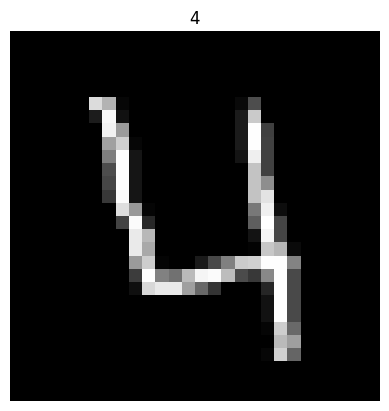

In [12]:
import matplotlib.pyplot as plt

# Convert the Series to a NumPy array
img = X_train.iloc[3].to_numpy()  # Use .to_numpy() instead of .as_matrix()

# Reshape the array to 28x28
img = img.reshape((28, 28))

# Plot the image
plt.imshow(img, cmap='gray')

# Add a title from the corresponding entry in the train DataFrame
plt.title(train.iloc[3, 0])

# Remove the axis
plt.axis("off")

# Display the plot
plt.show()


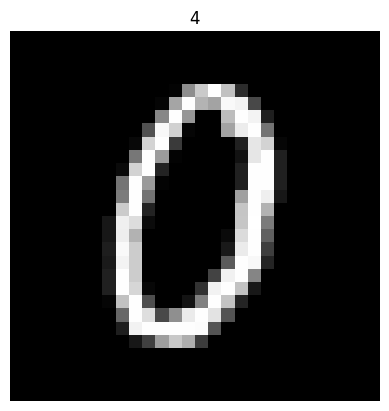

In [13]:
import matplotlib.pyplot as plt

# Convert the Series to a NumPy array
img = X_train.iloc[5].to_numpy()  # Use .to_numpy() instead of .as_matrix()

# Reshape the array to 28x28
img = img.reshape((28, 28))

# Plot the image
plt.imshow(img, cmap='gray')

# Add a title from the corresponding entry in the train DataFrame
plt.title(train.iloc[3, 0])

# Remove the axis
plt.axis("off")

# Display the plot
plt.show()


Normalization, Reshape and Label Encoding


In [14]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [16]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [18]:
# Label Encoding
from keras.utils import to_categorical # convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = 10)


Train Test Split


In [19]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


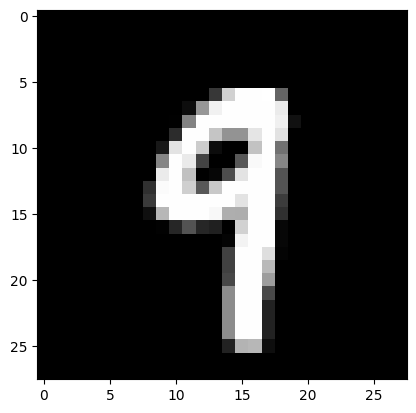

In [20]:
# Some examples
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

Convolutional Neural Network


In [2]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np


Epoch 1/10
25/25 [==============================] - 2s 41ms/step - loss: 2.3098 - accuracy: 0.1013 - val_loss: 2.3091 - val_accuracy: 0.1200
Epoch 2/10
25/25 [==============================] - 1s 30ms/step - loss: 2.3026 - accuracy: 0.1163 - val_loss: 2.3081 - val_accuracy: 0.1100
Epoch 3/10
25/25 [==============================] - 1s 31ms/step - loss: 2.3030 - accuracy: 0.1187 - val_loss: 2.3101 - val_accuracy: 0.0950
Epoch 4/10
25/25 [==============================] - 1s 31ms/step - loss: 2.3005 - accuracy: 0.1037 - val_loss: 2.3161 - val_accuracy: 0.1200
Epoch 5/10
25/25 [==============================] - 1s 29ms/step - loss: 2.3026 - accuracy: 0.1037 - val_loss: 2.3106 - val_accuracy: 0.1050
Epoch 6/10
25/25 [==============================] - 1s 30ms/step - loss: 2.3005 - accuracy: 0.1100 - val_loss: 2.3176 - val_accuracy: 0.1050
Epoch 7/10
25/25 [==============================] - 1s 50ms/step - loss: 2.3005 - accuracy: 0.1238 - val_loss: 2.3152 - val_accuracy: 0.1050
Epoch 8/10
25

In [3]:
# Load your data here (replace with your actual data loading)
X = np.random.rand(1000, 28, 28, 1)  # Example data: 1000 samples of 28x28 grayscale images
Y = np.random.randint(0, 10, 1000)   # Example labels: 1000 samples, 10 classes

In [5]:
# Split data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [6]:

# Convert labels to one-hot encoding
Y_train = to_categorical(Y_train, num_classes=10)
Y_val = to_categorical(Y_val, num_classes=10)

In [7]:
# Define the model
model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=16, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [9]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Data augmentation
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=20)

In [12]:
# Ensure `batch_size` and `epochs` are defined
batch_size = 32
epochs = 10


In [13]:
# Fit the model
history = model.fit(datagen.flow(X_train, Y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(X_val, Y_val),
                    steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
25/25 [==============================] - 7s 96ms/step - loss: 2.3443 - accuracy: 0.0763 - val_loss: 2.3077 - val_accuracy: 0.0900
Epoch 2/10
25/25 [==============================] - 1s 49ms/step - loss: 2.3078 - accuracy: 0.0975 - val_loss: 2.3057 - val_accuracy: 0.1200
Epoch 3/10
25/25 [==============================] - 1s 49ms/step - loss: 2.3030 - accuracy: 0.1013 - val_loss: 2.3036 - val_accuracy: 0.0750
Epoch 4/10
25/25 [==============================] - 1s 31ms/step - loss: 2.2989 - accuracy: 0.1187 - val_loss: 2.3054 - val_accuracy: 0.0750
Epoch 5/10
25/25 [==============================] - 1s 30ms/step - loss: 2.3018 - accuracy: 0.1050 - val_loss: 2.3040 - val_accuracy: 0.0850
Epoch 6/10
25/25 [==============================] - 1s 29ms/step - loss: 2.3000 - accuracy: 0.1025 - val_loss: 2.3039 - val_accuracy: 0.0900
Epoch 7/10
25/25 [==============================] - 1s 31ms/step - loss: 2.2994 - accuracy: 0.0938 - val_loss: 2.3034 - val_accuracy: 0.0950
Epoch 8/10
25

**Evaluate the model**


*Test Loss visualization*\
*Confusion matrix*

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [20]:
from sklearn.model_selection import train_test_split
import numpy as np

# Example data loading (replace with your actual data loading)
X = np.random.rand(1000, 28, 28, 1)  # Example data: 1000 samples of 28x28 grayscale images
Y = np.random.randint(0, 10, 1000)   # Example labels: 1000 samples, 10 classes

# Split data into training, validation, and test sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(Y_train, num_classes=10)
Y_val = to_categorical(Y_val, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)


In [21]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


7/7 [==============================] - 0s 7ms/step - loss: 2.3077 - accuracy: 0.0750
Test Loss: 2.307673454284668
Test Accuracy: 0.07500000298023224


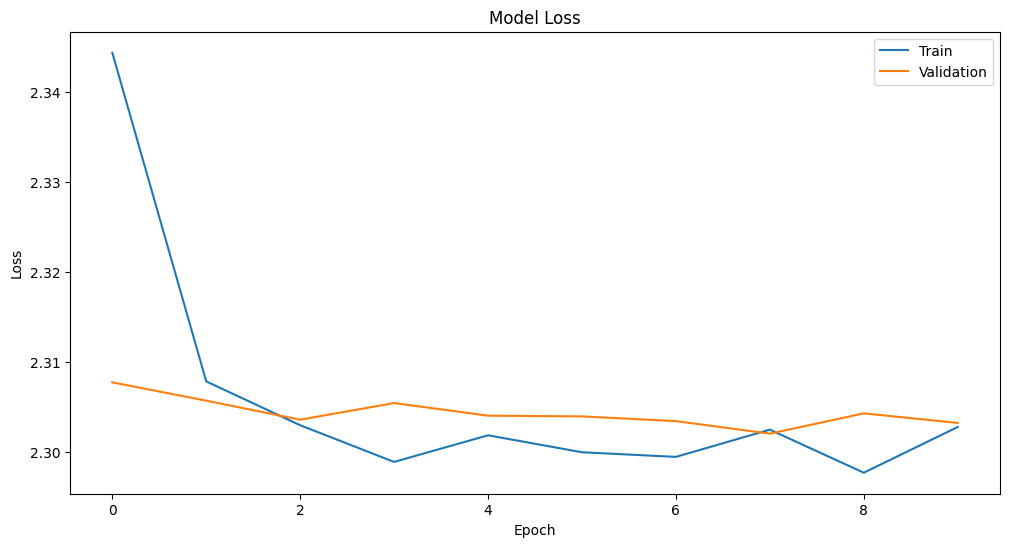

In [22]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()



**Plot Confusion Matrix**

7/7 [==============================] - 0s 7ms/step


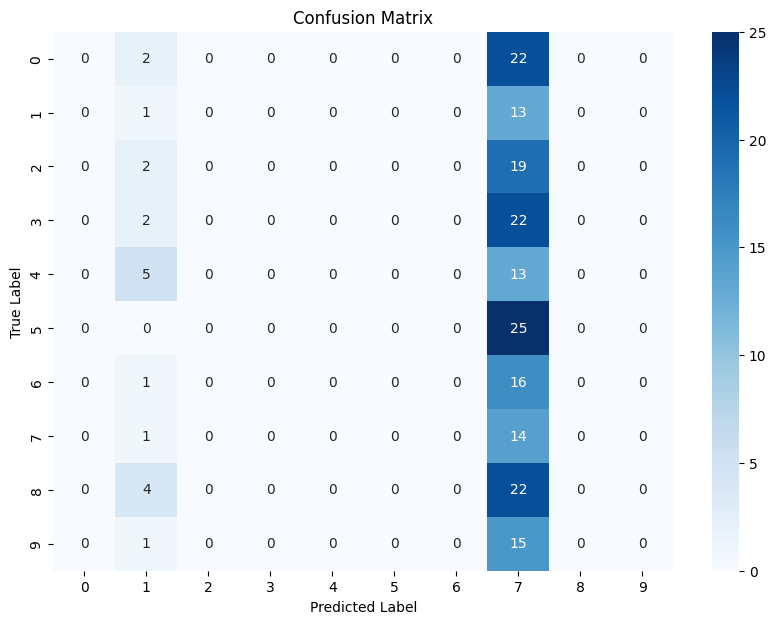

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict the labels for the test set
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true_classes = np.argmax(Y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(Y_true_classes, Y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
